In [5]:
import pandas as pd
df = pd.read_csv('Heart.csv')

In [6]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [7]:
#some data cleaning first
#unnamed column is unneccesary 
df = df.drop(columns = 'Unnamed: 0')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [8]:
#converting categorical values to numerical values
df['ChestPain'] = df['ChestPain'].astype('category')
df['ChestPain'] = df['ChestPain'].cat.codes
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [9]:
df['Thal'] = df['Thal'].astype('category')
df['Thal'] = df['Thal'].cat.codes

df['AHD'] = df['AHD'].astype('category')
df['AHD'] = df['AHD'].cat.codes

df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2,1
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0


In [10]:
#checking for null values
print(df.isnull().sum())

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         0
AHD          0
dtype: int64


In [11]:
#we only have 4 null values, we can exclude those
df = df.dropna()

In [12]:
X = df.drop(columns = 'AHD')
X

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,63,1,3,145,233,1,2,150,0,2.3,3,0.0,0
1,67,1,0,160,286,0,2,108,1,1.5,2,3.0,1
2,67,1,0,120,229,0,2,129,1,2.6,2,2.0,2
3,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,0,140,241,0,0,123,1,0.2,2,0.0,2
298,45,1,3,110,264,0,0,132,0,1.2,2,0.0,2
299,68,1,0,144,193,1,0,141,0,3.4,2,2.0,2
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2


In [13]:
y = df['AHD']
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: AHD, Length: 299, dtype: int8

In [14]:
#splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

In [15]:
X_train

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
290,67,1,1,152,212,0,2,150,0,0.8,2,0.0,2
264,61,1,0,138,166,0,2,125,1,3.6,2,1.0,1
197,45,0,0,138,236,0,2,152,1,0.2,2,0.0,1
77,51,0,1,140,308,0,2,142,0,1.5,1,1.0,1
15,57,1,1,150,168,0,0,174,0,1.6,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,69,1,1,140,254,0,2,146,0,2.0,2,3.0,2
120,48,1,0,130,256,1,2,150,1,0.0,1,2.0,2
48,65,0,1,140,417,1,2,157,0,0.8,1,1.0,1
262,60,0,3,150,240,0,0,171,0,0.9,1,0.0,1


In [16]:
X_test

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
61,46,0,1,142,177,0,2,160,1,1.4,3,0.0,1
300,57,1,0,130,131,0,0,115,1,1.2,2,1.0,2
55,54,1,0,124,266,0,2,109,1,2.2,2,1.0,2
245,67,1,0,120,237,0,0,71,0,1.0,2,0.0,1
95,52,1,0,128,255,0,0,161,1,0.0,1,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,41,1,2,135,203,0,0,132,0,0.0,2,0.0,0
117,35,0,0,138,183,0,0,182,0,1.4,1,0.0,1
211,38,1,3,120,231,0,0,182,1,3.8,2,0.0,2
233,74,0,2,120,269,0,2,121,1,0.2,1,1.0,1


In [17]:
#when we look at our data some values are too big while other are small, we shall use a standard scaler
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train_scaled = scaler.fit_transform(X_train)

In [30]:
#we donot fit the test data to the scaler because we do not want our model
#to know the mean and standard deviation. We keep the data for evaluation purposes
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled

array([[ 1.38573367,  0.67185481,  0.21213203, ...,  0.70792084,
        -0.70203785,  1.13274336],
       [ 0.71454401,  0.67185481, -0.84347737, ...,  0.70792084,
         0.36119339, -0.49996949],
       [-1.07529507, -1.48841682, -0.84347737, ...,  0.70792084,
        -0.70203785, -0.49996949],
       ...,
       [ 1.16200378, -1.48841682,  0.21213203, ..., -1.01249144,
         0.36119339, -0.49996949],
       [ 0.60267907, -1.48841682,  2.32335085, ..., -1.01249144,
        -0.70203785, -0.49996949],
       [ 0.82640895, -1.48841682, -0.84347737, ...,  0.70792084,
        -0.70203785, -0.49996949]])

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
log_reg = LogisticRegression(random_state = 0).fit(X_train_scaled, y_train)

In [34]:
#check if the model can predict
log_reg.predict(X_train_scaled)

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0], dtype=int8)

In [35]:
#how accurate are our values
log_reg.score(X_train_scaled, y_train)

0.8708133971291866

In [36]:
log_reg1 = LogisticRegression(random_state = 0,
                             C = 1,
                             fit_intercept = True
                             ).fit(X_train_scaled, y_train)

In [37]:
log_reg1.score(X_train_scaled, y_train)

0.8708133971291866

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
y_pred_test = log_reg.predict(X_test_scaled)

In [40]:
cm = confusion_matrix(y_test, y_pred_test)
cm

array([[44,  2],
       [11, 33]])

Text(33.22222222222222, 0.5, 'Actual Value')

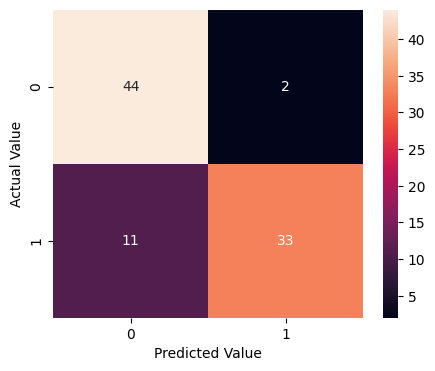

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 4))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

In [42]:
#the model has predicted 0 where the actual value is 0 44 times
#the model 0 where the actual value is 1, 11 wrong times
#the model has predicted 1 where the actual value is 0, 2 wrong times
#the model has predicted 1 where the actua value is 1, 33 times